# Comprehensive Data Preprocessing and Feature Engineering Notebook

## 1. Title & Learning Objectives

**Title**: Data Preprocessing and Feature Engineering for Machine Learning with the UCI Student Performance Dataset

**Learning Objectives**:
- Understand the importance of data preprocessing and feature engineering in machine learning.
- Learn techniques to detect and handle **missing values** using various imputation strategies.
- Identify and treat **outliers** using statistical and machine learning methods.
- Address **overfitting and underfitting** through model evaluation and regularization.
- Apply **Principal Component Analysis (PCA)** for dimensionality reduction.
- Explore **feature selection**, **extraction**, and **engineering** techniques to improve model performance.
- Understand and calculate **evaluation metrics** to assess model performance.
- Build robust preprocessing pipelines for reproducibility.
- Conduct basic fairness checks and mitigate **target leakage**.

## 2. Introduction

Data preprocessing and feature engineering are critical steps in preparing raw data for machine learning models. These processes improve model performance, reduce noise, and ensure robustness. In this notebook, we use the **UCI Student Performance Dataset** to demonstrate these techniques. The dataset contains information about student performance in Mathematics, including demographic, social, and academic features, with the target being the final grade (`G3`).

We will:
- Load and explore the dataset.
- Apply various techniques to handle missing values and outliers.
- Address overfitting and underfitting.
- Perform PCA, feature selection, extraction, and engineering.
- Evaluate model performance using appropriate metrics.
- Create a preprocessing pipeline for reproducibility.
- Check for fairness and target leakage.


## 3. Setup and Dataset Loading

### 3.1. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### 3.2. Load the Dataset

The UCI Student Performance Dataset is available at the UCI Machine Learning Repository. We use the Mathematics dataset (`student-mat.csv`).


In [ ]:
# Load the dataset
student_mat = pd.read_csv('/content/student-mat.csv' , sep = ';')
student_por = pd.read_csv('/content/student-por.csv' , sep = ';')

# Display first few rows
student_mat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
student_por.shape

(649, 33)

In [ ]:
student_mat.shape

(395, 33)

In [ ]:
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
common_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
               'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
               'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


#data = pd.merge(student_mat , student_por , on = common_cols, suffixes= ['_mat' , '_por'])
data = pd.merge(student_mat, student_por , on = common_cols , suffixes= ['_mat' , '_por'], how = 'outer')

data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,1,1,4,NaN,NaN,NaN,13.0,13.0,13.0
1,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,1,1,2,7.0,10.0,10.0,NaN,NaN,NaN
2,GP,F,15,R,GT3,T,1,1,other,other,...,1,1,1,2,NaN,NaN,NaN,8.0,9.0,9.0
3,GP,F,15,R,GT3,T,1,1,other,other,...,2,4,5,2,NaN,NaN,NaN,13.0,11.0,11.0
4,GP,F,15,R,GT3,T,1,1,other,other,...,2,4,5,2,8.0,6.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MS,M,19,U,GT3,T,3,2,at_home,services,...,1,1,3,4,NaN,NaN,NaN,6.0,11.0,9.0
1001,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,3,5,5,8.0,9.0,9.0,NaN,NaN,NaN
1002,MS,M,20,R,GT3,T,1,1,other,other,...,2,4,4,12,NaN,NaN,NaN,8.0,11.0,10.0
1003,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9.0,9.0,9.0,NaN,NaN,NaN


In [ ]:
data['G3'] = data.apply(lambda row: (row['G3_mat'] + row['G3_por']) / 2
                                   if pd.notna(row['G3_mat']) and pd.notna(row['G3_por'])
                                   else row['G3_mat'] if pd.notna(row['G3_mat'])
                                   else row['G3_por'], axis=1)

In [ ]:
def calculate_g3(row):
  if pd.notna(row['G3_mat']) and pd.notna(row['G3_por']):
    return (row['G3_mat'] + row['G3_por'])/2

  elif pd.notna(row['G3_mat']):
    return row['G3_mat']

  else :
    return row['G3_por']

data['G3'] = data.apply(calculate_g3 , axis = 1)


# merged_students['G3'] = merged_students.apply(lambda row: (row['G3_mat'] + row['G3_por']) / 2
#                                    if pd.notna(row['G3_mat']) and pd.notna(row['G3_por'])
#                                    else row['G3_mat'] if pd.notna(row['G3_mat'])
#                                    else row['G3_por'], axis=1)

In [ ]:
data['G3']

,G3
0,13.0
1,10.0
2,9.0
3,11.0
4,5.0
...,...
1000,9.0
1001,9.0
1002,10.0
1003,9.0


In [ ]:
numeric_cols = data.select_dtypes(include= np.number ).columns.tolist()
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1_mat',
 'G2_mat',
 'G3_mat',
 'G1_por',
 'G2_por',
 'G3_por',
 'G3']

In [ ]:
data['studytime'].value_counts()

,count
studytime,
2,485
1,305
3,155
4,60


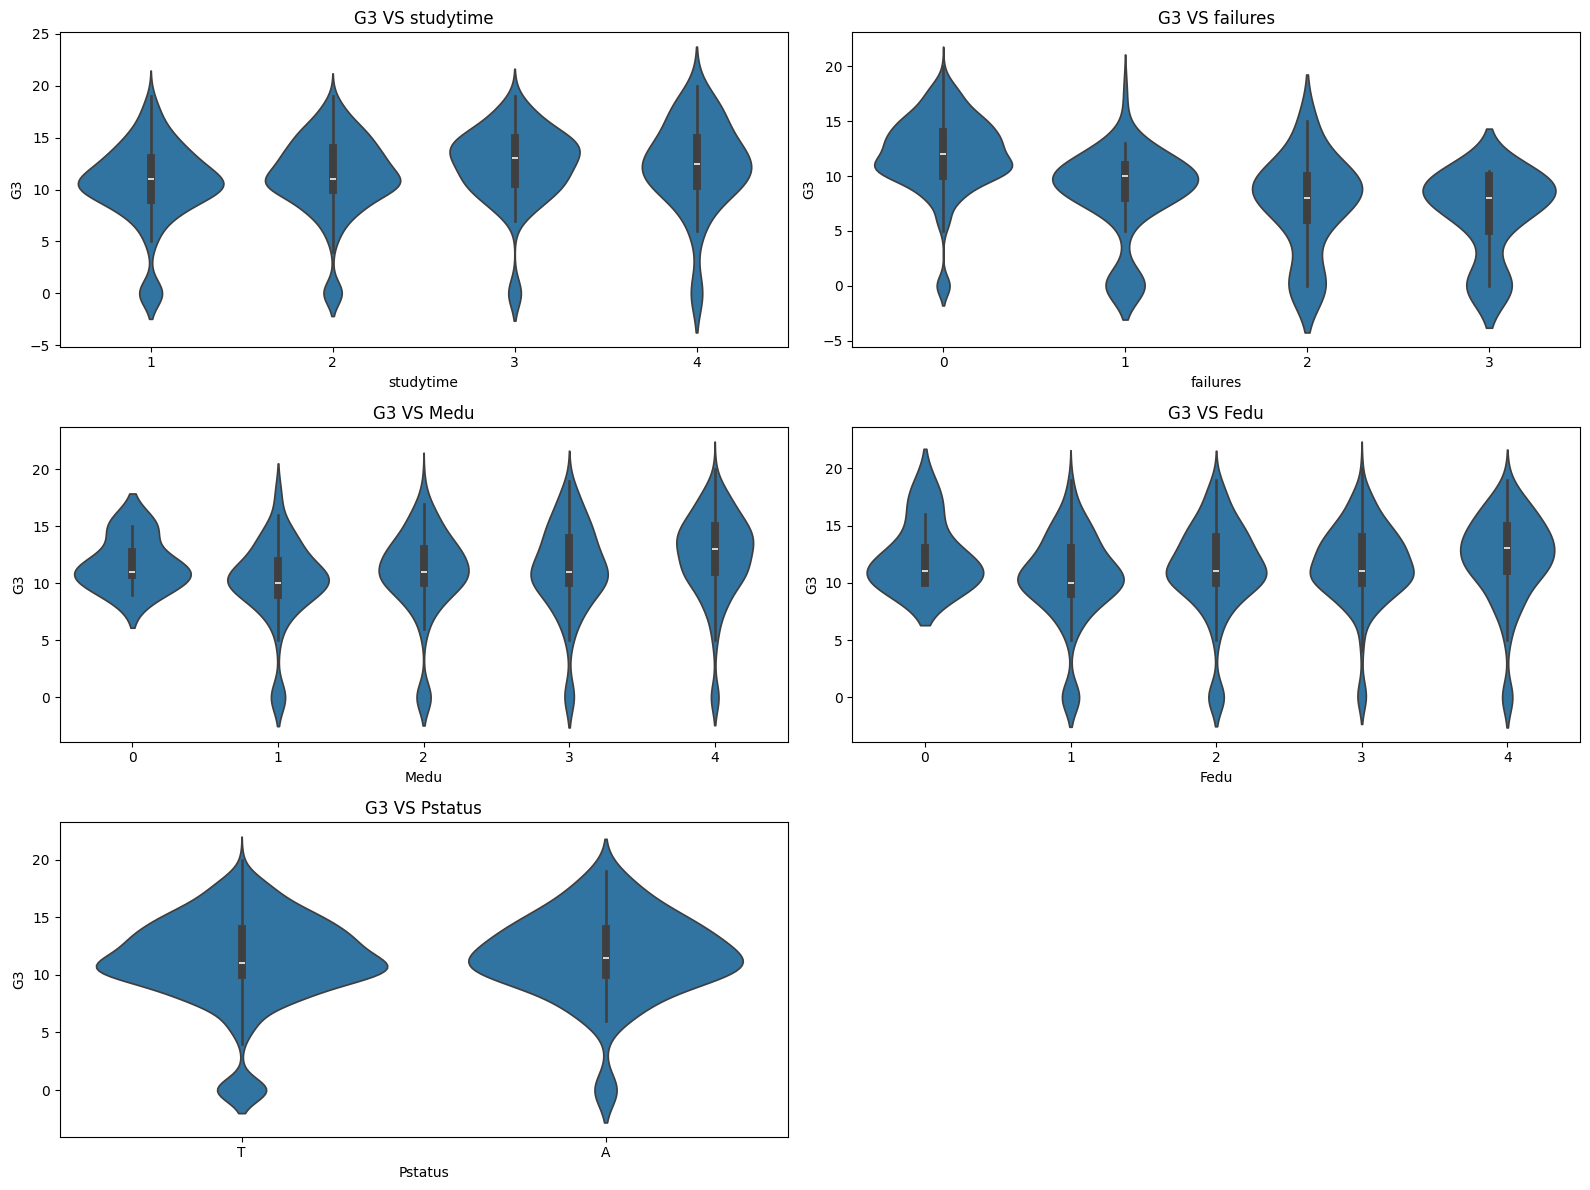

In [ ]:
key_features = ['studytime' , 'failures' , 'Medu' , 'Fedu' , 'Pstatus']
# categorical_coks = df.select_dtypes(include = ['object']).columns.tolist()

plt.figure(figsize=(16 , 12))

for i , col in enumerate(key_features):
  plt.subplot(3 , 2 , i+1 )
  sns.violinplot(x = col,  y = 'G3', data = data)
  plt.title(f"G3 VS {col}")

plt.tight_layout()
plt.show()

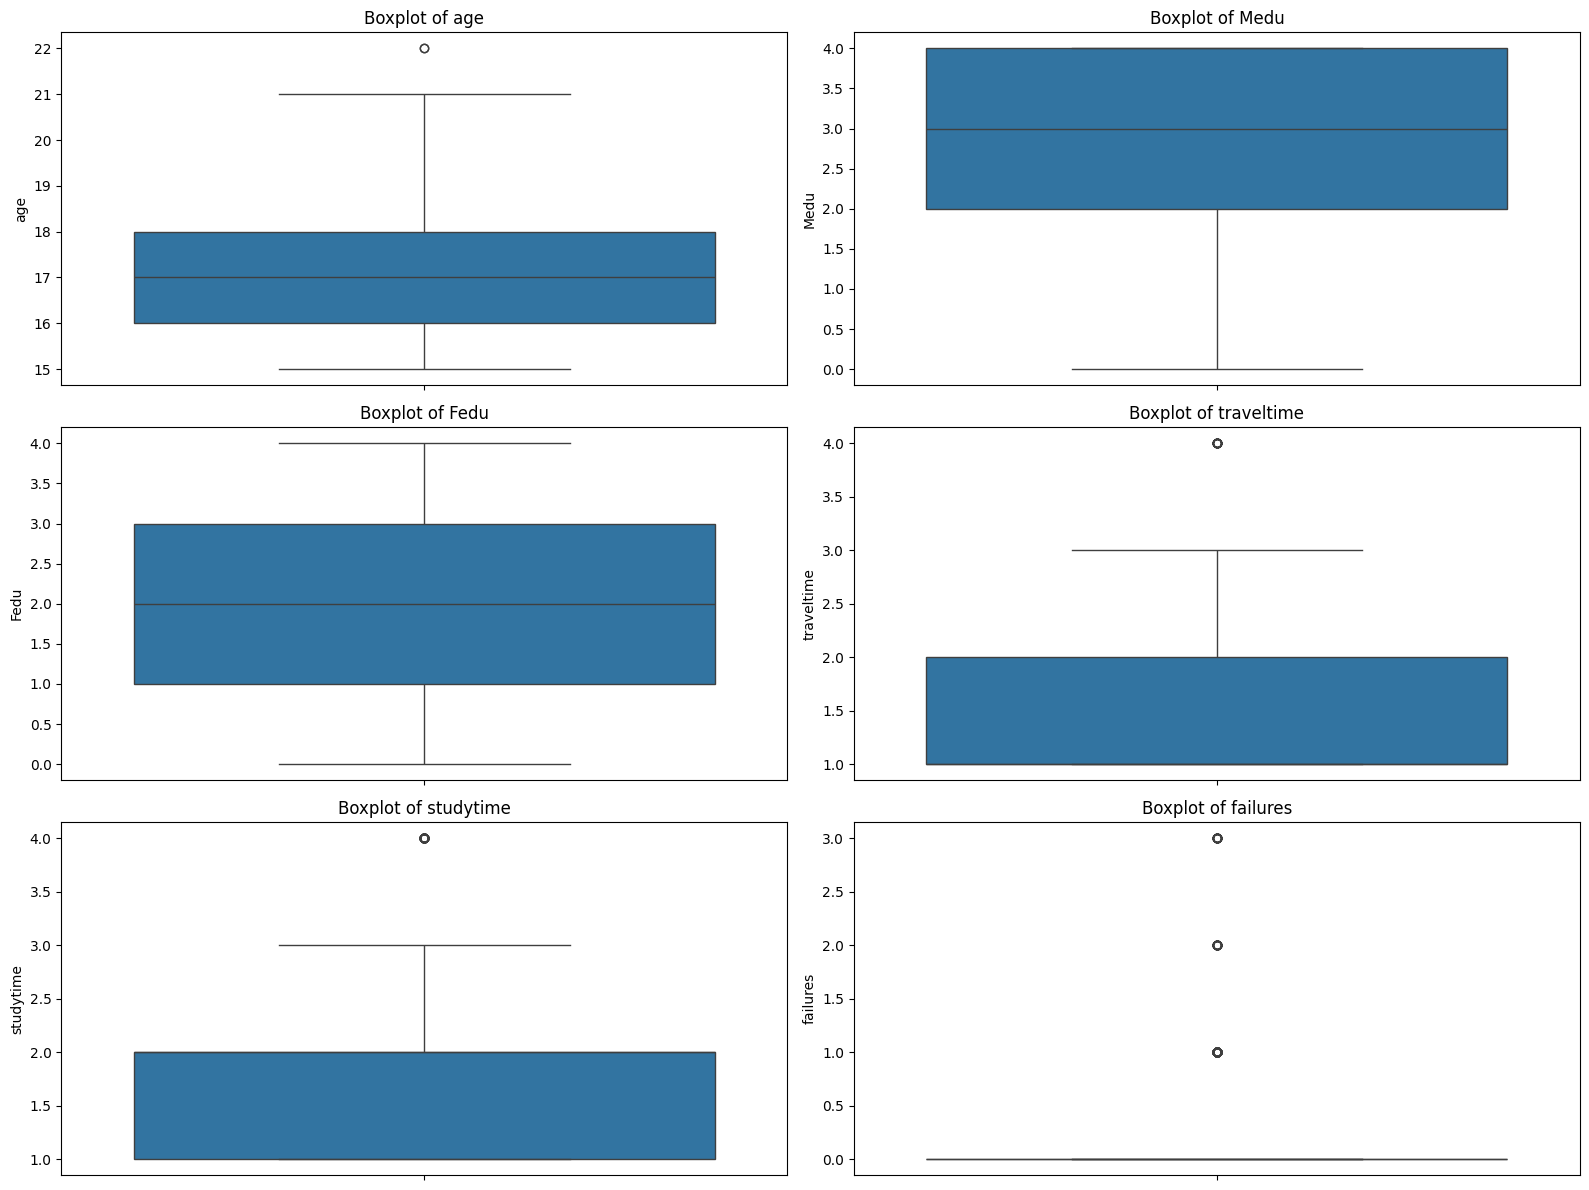

In [ ]:
plt.figure(figsize=(16 , 12))

for i , col in enumerate(numeric_cols[:6]):
  plt.subplot(3 , 2 , i+1 )
  sns.boxplot(data[col] )
  plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 3.3. Dataset Overview

The dataset contains 33 features, including:
- **Numeric features**: age, studytime, failures, absences, G1, G2, G3 (final grade, target variable).
- **Categorical features**: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, etc.
- **Target**: G3 (final grade, numeric).

**Sample Data**:
- 395 rows, 33 columns.
- No missing values are explicitly reported, but we’ll simulate missing values for demonstration.


In [ ]:
# Basic info
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1005 non-null   object 
 1   sex         1005 non-null   object 
 2   age         1005 non-null   int64  
 3   address     1005 non-null   object 
 4   famsize     1005 non-null   object 
 5   Pstatus     1005 non-null   object 
 6   Medu        1005 non-null   int64  
 7   Fedu        1005 non-null   int64  
 8   Mjob        1005 non-null   object 
 9   Fjob        1005 non-null   object 
 10  reason      1005 non-null   object 
 11  guardian    1005 non-null   object 
 12  traveltime  1005 non-null   int64  
 13  studytime   1005 non-null   int64  
 14  failures    1005 non-null   int64  
 15  schoolsup   1005 non-null   object 
 16  famsup      1005 non-null   object 
 17  paid        1005 non-null   object 
 18  activities  1005 non-null   object 
 19  nursery     1005 non-null  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por,G3
count,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,395.000000,395.000000,395.000000,649.000000,649.000000,649.000000,1005.000000
mean,16.743284,2.600995,2.38408,1.528358,1.970149,0.267662,3.924378,3.194030,3.172139,1.500498,2.291542,3.550249,4.521393,10.908861,10.713924,10.415190,11.399076,11.570108,11.906009,11.302488
std,1.236790,1.120703,1.10041,0.733682,0.834457,0.659741,0.937410,1.036757,1.154076,0.920792,1.281021,1.424289,6.275132,3.319195,3.761505,4.581443,2.745265,2.913639,3.230656,3.859077
min,15.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.00000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,3.000000,2.00000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,11.000000
75%,18.000000,4.000000,3.00000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.000000,13.000000,14.000000,14.000000
max,22.000000,4.000000,4.00000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000,20.000000


## 4. Handling Missing Values

### 4.1. Detecting Missing Values

Missing values can degrade model performance. Let’s check for missing values and simulate some for demonstration.


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Simulate missing values in 'G1' and 'studytime'
np.random.seed(42)
data.loc[np.random.choice(data.index, 50), 'G1'] = np.nan
data.loc[np.random.choice(data.index, 30), 'studytime'] = np.nan

# Verify missing values
print(data[['G1', 'studytime']].isnull().sum())


school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1_mat        610
G2_mat        610
G3_mat        610
G1_por        356
G2_por        356
G3_por        356
G3              0
dtype: int64
G1           1005
studytime      30
dtype: int64


**Expected Output**:
- Original dataset: No missing values.
- After simulation: `G1` has 50 missing values, `studytime` has 30 missing values.

### 4.2. Methods to Handle Missing Values

#### 4.2.1. Mean/Median/Mode Imputation
- **Use**: Replace missing values with the mean (numeric), median (numeric), or mode (categorical).
- **Pros**: Simple, fast.
- **Cons**: Ignores relationships between features, may introduce bias.


In [ ]:
# Mean imputation for 'G1'
mean_imputer = SimpleImputer(strategy='mean')
data['G1_mean_imputed'] = mean_imputer.fit_transform(data[['G1']])

# Median imputation for 'studytime'
median_imputer = SimpleImputer(strategy='median')
data['studytime_median_imputed'] = median_imputer.fit_transform(data[['studytime']])

# Verify
print(data[['G1', 'G1_mean_imputed', 'studytime', 'studytime_median_imputed']].head())

   G1  G1_mean_imputed  studytime  studytime_median_imputed
0 NaN    3.048040e-315        4.0                       4.0
1 NaN    3.048040e-315        4.0                       4.0
2 NaN    3.048040e-315        1.0                       1.0
3 NaN    3.048040e-315        2.0                       2.0
4 NaN    3.048040e-315        2.0                       2.0


#### 4.2.2. K-Nearest Neighbors (KNN) Imputation
- **Use**: Imputes missing values based on the values of the nearest neighbors.
- **Pros**: Considers feature relationships.
- **Cons**: Computationally expensive for large datasets.


In [ ]:
# KNN imputation for 'G1'
knn_imputer = KNNImputer(n_neighbors=5)
data['G1_knn_imputed'] = knn_imputer.fit_transform(data[['G1']])

# Verify
print(data[['G1', 'G1_knn_imputed']].head())


   G1  G1_knn_imputed
0 NaN   7.512960e-319
1 NaN   7.512960e-319
2 NaN   7.512960e-319
3 NaN   7.512960e-319
4 NaN   7.512960e-319


#### 4.2.3. Dropping Missing Values
- **Use**: Remove rows or columns with missing values.
- **Pros**: Simple, no assumptions.
- **Cons**: Loss of data, especially problematic with small datasets.


In [ ]:
# Drop rows with missing values in 'G1'
data_dropped = data.dropna(subset=['G1'])
print(f"Original shape: {data.shape}, After dropping: {data_dropped.shape}")


Original shape: (1005, 41), After dropping: (0, 41)


#### 4.2.4. Forward/Backward Fill
- **Use**: Propagate the last valid observation forward or backward (suitable for time-series).
- **Note**: Not applicable here, as the dataset is not time-series.

### 4.3. Choosing the Right Method
- **Mean/Median**: Use for numeric data with low missingness and no strong correlations.
- **KNN**: Use when features are correlated.
- **Dropping**: Use when missing data is minimal (<5%).
- **Evaluation**: Compare model performance (e.g., RMSE) with different imputation strategies.


In [ ]:
# Evaluate imputation impact
X = data[['studytime_median_imputed', 'G1_mean_imputed']].fillna(0)
y = data['G3'].fillna(data['G3'].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RMSE with mean/median imputation: {mean_squared_error(y_test, y_pred):.2f}")


RMSE with mean/median imputation: 15.71


## 5. Detecting and Handling Outliers

### 5.1. Detecting Outliers

Outliers are extreme values that deviate significantly from the rest of the data.

#### 5.1.1. Z-Score Method
- **Use**: Identifies outliers based on standard deviations from the mean (|Z| > 3).


In [ ]:
# Z-score for 'absences'
data['z_score_absences'] = np.abs(stats.zscore(data['absences'].fillna(data['absences'].mean())))
outliers_z = data[data['z_score_absences'] > 3]
print(f"Outliers using Z-score: {len(outliers_z)}")


Outliers using Z-score: 14


#### 5.1.2. Interquartile Range (IQR) Method
- **Use**: Identifies outliers as values outside 1.5 * IQR from Q1 or Q3.
- **Pros**: Robust to non-normal distributions.


Outliers using IQR: 54


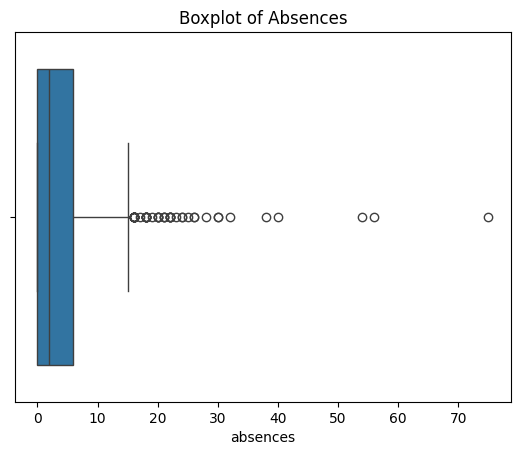

In [ ]:
# IQR for 'absences'
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)]
print(f"Outliers using IQR: {len(outliers_iqr)}")

# Visualize
sns.boxplot(x=data['absences'])
plt.title('Boxplot of Absences')
plt.show()


#### 5.1.3. Isolation Forest
- **Use**: Machine learning approach to detect outliers by isolating observations.
- **Pros**: Works well for high-dimensional data.


In [ ]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_iso = iso_forest.fit_predict(data[['absences', 'G1_mean_imputed']].fillna(0))
data['outlier_iso'] = outliers_iso
print(f"Outliers using Isolation Forest: {sum(data['outlier_iso'] == -1)}")


Outliers using Isolation Forest: 101


### 5.2. Handling Outliers

#### 5.2.1. Removing Outliers
- **Use**: Delete rows with outliers.
- **Cons**: Loss of data.


In [ ]:
# Remove outliers based on IQR
data_no_outliers = data[(data['absences'] >= lower_bound) & (data['absences'] <= upper_bound)]
print(f"Shape after removing outliers: {data_no_outliers.shape}")


Shape after removing outliers: (951, 43)


#### 5.2.2. Capping (Winsorization)
- **Use**: Replace outliers with the nearest non-outlier value.
- **Pros**: Preserves data size.


In [ ]:
# Capping 'absences'
data['absences_capped'] = data['absences'].clip(lower=lower_bound, upper=upper_bound)


#### 5.2.3. Transformation
- **Use**: Apply log or square root transformation to reduce outlier impact.
- **Pros**: Retains all data, reduces skewness.


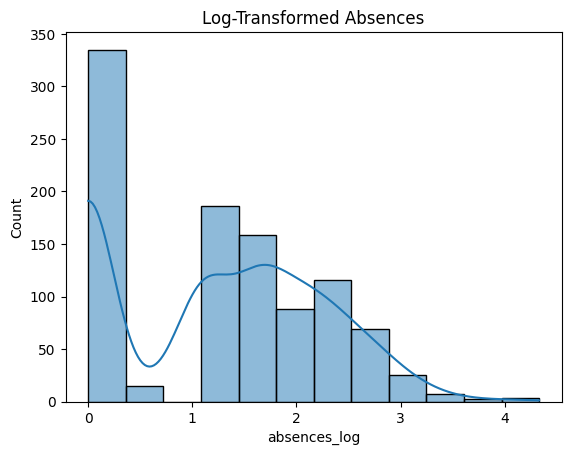

In [ ]:
# Log transformation
data['absences_log'] = np.log1p(data['absences'].fillna(0))
sns.histplot(data['absences_log'], kde=True)
plt.title('Log-Transformed Absences')
plt.show()


### 5.3. Choosing the Right Method
- **Z-Score/IQR**: Use for univariate analysis.
- **Isolation Forest**: Use for multivariate outlier detection.
- **Remove vs. Cap vs. Transform**: Remove if outliers are errors; cap or transform if valid but extreme.


## 6. Overfitting and Underfitting

### 6.1. Definitions
- **Overfitting**: Model learns noise in training data, poor test performance.
- **Underfitting**: Model is too simple, fails to capture patterns.

### 6.2. Detecting Overfitting/Underfitting
- **Method**: Compare training and test performance (e.g., RMSE).
- **Signs**:
  - Overfitting: Low training error, high test error.
  - Underfitting: High error on both.


In [ ]:
# Train-test split
X = data[['studytime_median_imputed', 'G1_mean_imputed', 'absences_capped']]
y = data['G3'].fillna(data['G3'].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest (prone to overfitting)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print(f"Train RMSE: {mean_squared_error(y_train, train_pred):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test, test_pred):.2f}")

Train RMSE: 13.14
Test RMSE: 16.03


**Expected Output**:
- If Train RMSE << Test RMSE: Overfitting.
- If both high: Underfitting.

### 6.3. Handling Overfitting
- Simplify model, add regularization, use cross-validation, or collect more data.


In [ ]:
# Regularized Random Forest
rf_regularized = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf_regularized.fit(X_train, y_train)
train_pred_reg = rf_regularized.predict(X_train)
test_pred_reg = rf_regularized.predict(X_test)

print(f"Regularized Train RMSE: {mean_squared_error(y_train, train_pred_reg):.2f}")
print(f"Regularized Test RMSE: {mean_squared_error(y_test, test_pred_reg):.2f}")

Regularized Train RMSE: 13.28
Regularized Test RMSE: 15.89


### 6.4. Handling Underfitting
- Increase model complexity, improve feature engineering, or tune hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 5, 'n_estimators': 50}


## 7. Principal Component Analysis (PCA)

### 7.1. Purpose
PCA reduces dimensionality by transforming features into uncorrelated components.

### 7.2. Applying PCA


Explained variance ratio: [0.35734178 0.24760676]


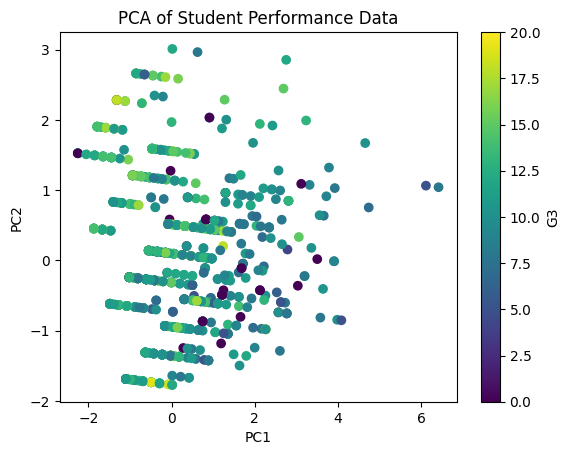

In [ ]:
# Select numeric features
numeric_features = ['age', 'studytime_median_imputed', 'failures', 'absences_capped', 'G1_mean_imputed']
X_numeric = data[numeric_features].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['G3'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Student Performance Data')
plt.colorbar(label='G3')
plt.show()


### 7.3. Handling PCA Issues
- **Problem**: Loss of interpretability.
  - **Solution**: Analyze `pca.components_`.
- **Problem**: Over-reduction.
  - **Solution**: Retain 80-95% variance.
- **Problem**: Sensitive to scaling.
  - **Solution**: Always standardize features.


## 8. Feature Selection, Extraction, and Engineering

### 8.1. Feature Selection

#### 8.1.1. Filter Method: SelectKBest
- Selects top k features based on statistical tests.


In [ ]:
# Select top 3 features
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_numeric, y)
selected_features = X_numeric.columns[selector.get_support()]
print(f"Selected features: {selected_features}")


Selected features: Index(['age', 'studytime_median_imputed', 'failures'], dtype='object')


#### 8.1.2. Wrapper Method: Recursive Feature Elimination (RFE)
- Iteratively removes least important features.


In [ ]:
# RFE with Random Forest
model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_numeric, y)
selected_features_rfe = X_numeric.columns[rfe.support_]
print(f"RFE selected features: {selected_features_rfe}")


RFE selected features: Index(['age', 'failures', 'absences_capped'], dtype='object')


#### 8.1.3. Embedded Method: Feature Importance
- Uses model-specific importance scores.


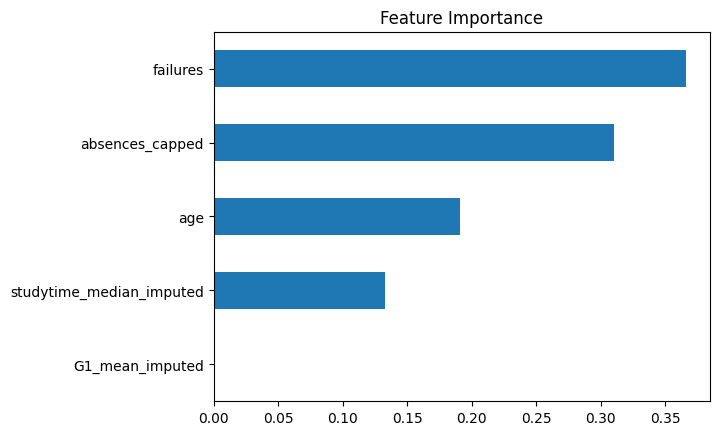

In [ ]:
# Feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_numeric, y)
importances = pd.Series(rf.feature_importances_, index=X_numeric.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

### 8.2. Feature Extraction
- PCA (above) is an example of feature extraction.

### 8.3. Feature Engineering
- Create new features to capture domain knowledge.


### 8.4. Handling Issues
- **Irrelevant features**: Use feature selection.
- **Target leakage**: Avoid using features like G2 that are highly correlated with G3.
- **High dimensionality**: Combine selection and PCA.


## 9. Evaluation Metrics

### 9.1. Regression Metrics
- **MSE**: Average squared difference.
- **RMSE**: Square root of MSE.
- **MAE**: Average absolute difference.
- **R²**: Proportion of variance explained.


In [ ]:
# Evaluate Random Forest
y_pred = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MSE: 8.96
RMSE: 8.96
MAE: 2.12
R²: 0.40


### 9.2. Choosing Metrics
- **RMSE**: Use when large errors are bad.
- **MAE**: Use when all errors are equally important.
- **R²**: Use to measure explanatory power.


## 10. Preprocessing Pipeline

Create a pipeline for reproducibility.


In [ ]:
# Define features
numeric_features = ['age', 'studytime', 'failures', 'absences', 'G1']
categorical_features = ['school', 'sex', 'address']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit and evaluate
X = data[numeric_features + categorical_features]
y = data['G3'].fillna(data['G3'].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Pipeline RMSE: {mean_squared_error(y_test, y_pred):.2f}")


Pipeline RMSE: 15.34


## 11. Fairness Checks and Target Leakage

### 11.1. Fairness Checks
Check for bias across groups (e.g., sex).


In [ ]:
# Evaluate by sex
data_test = X_test.copy()
data_test['y_true'] = y_test
data_test['y_pred'] = y_pred
data_test['sex'] = data.loc[X_test.index, 'sex']

for sex in data_test['sex'].unique():
    mask = data_test['sex'] == sex
    rmse = mean_squared_error(data_test[mask]['y_true'], data_test[mask]['y_pred'])
    print(f"RMSE for {sex}: {rmse:.2f}")


RMSE for M: 15.49
RMSE for F: 15.22


### 11.2. Target Leakage
- **Problem**: Using features like G2 that are highly correlated with G3.
- **Solution**: Exclude such features.


In [ ]:
# Exclude G2 to avoid leakage
X_no_leakage = data[['age', 'studytime_median_imputed', 'failures', 'absences_capped', 'G1_mean_imputed']]
pipeline_no_leakage = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X_no_leakage, y, test_size=0.2, random_state=42)
pipeline_no_leakage.fit(X_train, y_train)
y_pred = pipeline_no_leakage.predict(X_test)
print(f"RMSE without leakage: {mean_squared_error(y_test, y_pred):.2f}")


RMSE without leakage: 14.56


## 12. Conclusion

This notebook covered:
- **Missing Values**: Handled using mean/median, KNN, and dropping.
- **Outliers**: Detected with Z-score, IQR, Isolation Forest; handled by removing, capping, transforming.
- **Overfitting/Underfitting**: Mitigated with regularization and tuning.
- **PCA**: Applied for dimensionality reduction.
- **Feature Selection/Engineering**: Used filter, wrapper, embedded methods; created new features.
- **Evaluation Metrics**: Calculated MSE, RMSE, MAE, R².
- **Pipeline**: Built for reproducibility.
- **Fairness and Leakage**: Checked for bias and avoided leakage.

**Next Steps**:
- Experiment with different imputation strategies.
- Try additional feature engineering.
- Perform hyperparameter tuning.
- Explore fairness metrics in depth.
